In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

# Q1

a) Dimension Reduction ; Input = Grades of 50 courses ; Output = Most 5 useful numbers <br>
b) Clustering ; Input = Performance
in various courses and extra-curricular activities ; Output = Personality Groups <br>
c) Regression ; Input = Performance in
various courses, extra-curricular activities, and first job type ; Output = Salary <br>
d) Classification ; Input = Performance in various courses and
extra-curricular activities ; Output = Job type <br>

# Q2 (Seoul Bike Data)

In [2]:
df = pd.read_csv('SeoulBikeData (2).csv', skiprows=1, encoding = 'unicode_escape')
cols = ['Date','Rented Bike Count',	'Hour'	,'Temperature(°C)'	,'Humidity(%)'	,'Wind speed (m/s)',	'Visibility (10m)',	
        'Dew point temperature(°C)'	,'Solar Radiation (MJ/m2)',	'Rainfall(mm)'	,'Snowfall (cm)',	'Seasons','Holiday'	,'Functioning Day']
df.columns = cols
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df['Rented Bike Count'].value_counts()

0       295
223      19
262      19
122      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

(a) As number of biked rented is integer, it is discrete dataype, it is a supervised problem , **Rented Bike Count** is the target variable

(b) As this would a regressor task, taking RMSE and R2 score as performance criteria

In [4]:
data = df.copy()
label_Seasons = data['Seasons'][data['Seasons'].duplicated()==False]
data['Seasons'] = data['Seasons'].replace(list(label_Seasons),range(len(label_Seasons)))
label_Holiday = data['Holiday'][data['Holiday'].duplicated()==False]
data['Holiday'] = data['Holiday'].replace(list(label_Holiday),range(len(label_Holiday)))
label_functioning_day = data['Functioning Day'][data['Functioning Day'].duplicated()==False]
data['Functioning Day'] = data['Functioning Day'].replace(list(label_functioning_day),range(len(label_functioning_day)))
data = data.drop(columns=['Date'])
#data = data.drop(columns=['Dew point temperature(°C)'])
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
2,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
3,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0
4,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,0,0,0


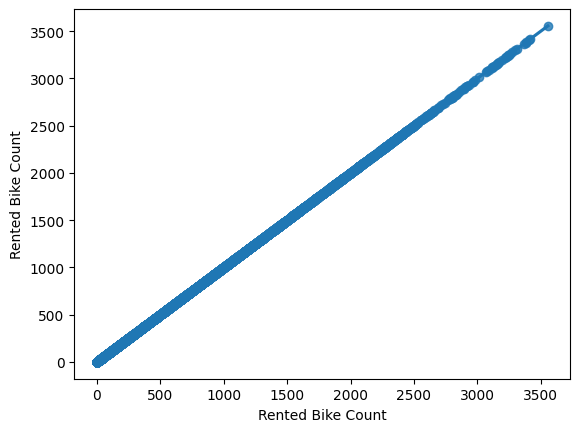

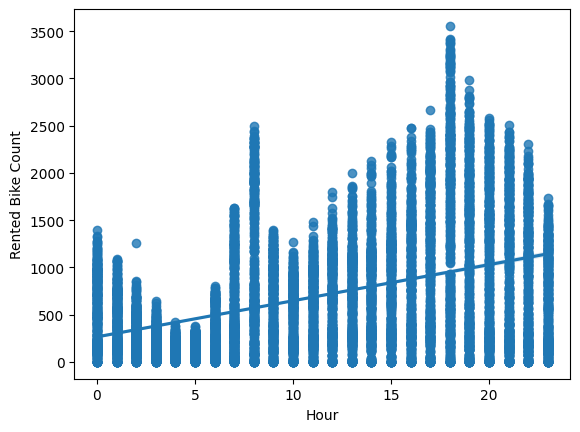

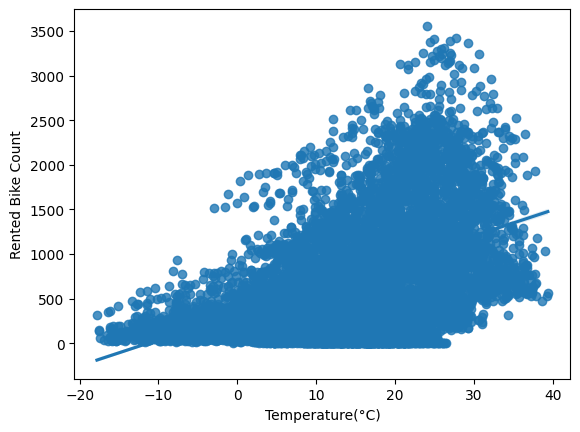

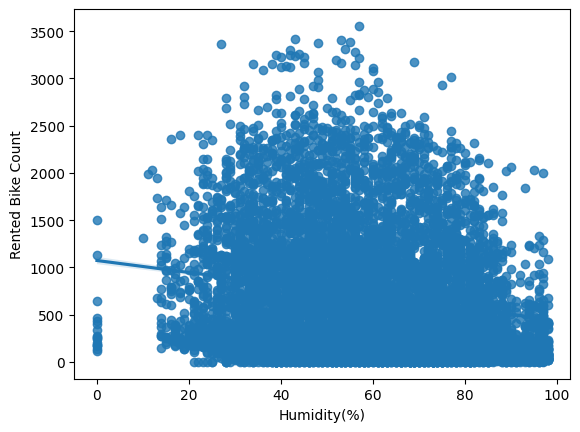

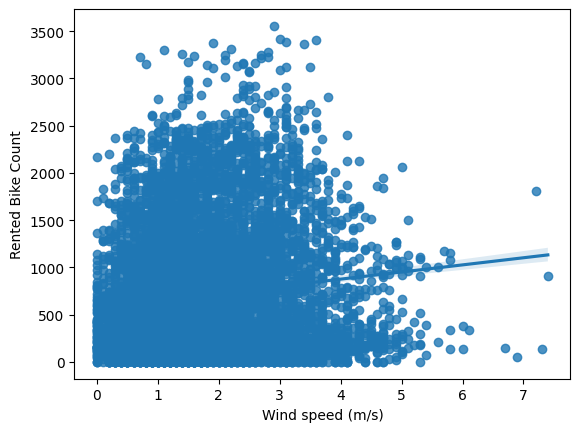

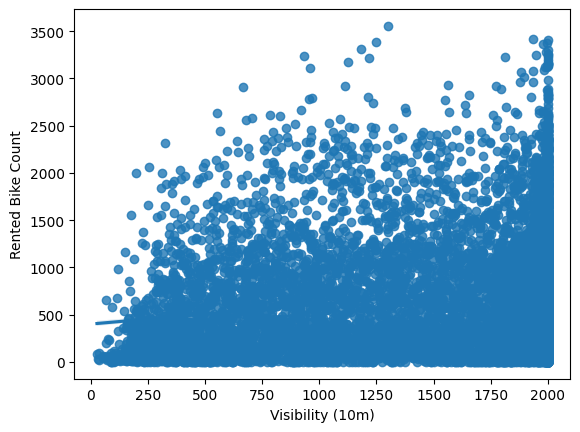

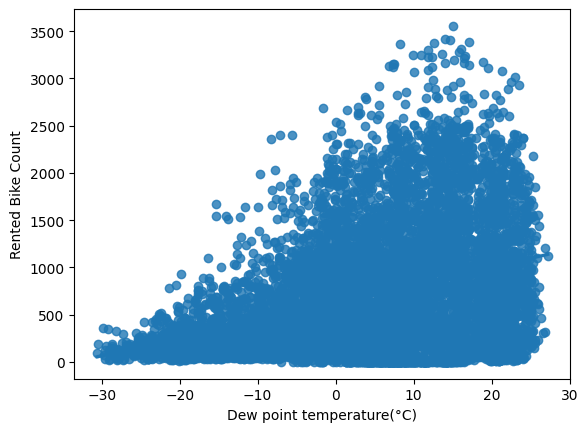

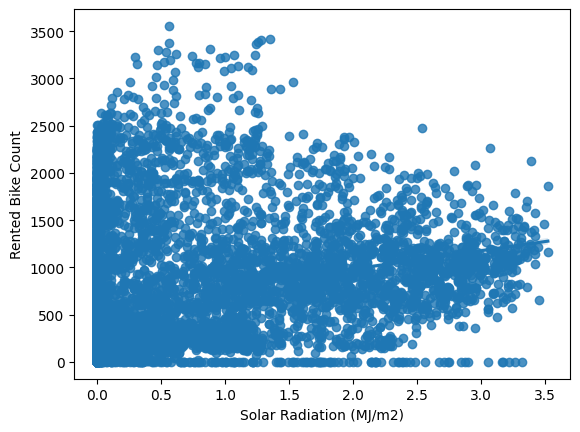

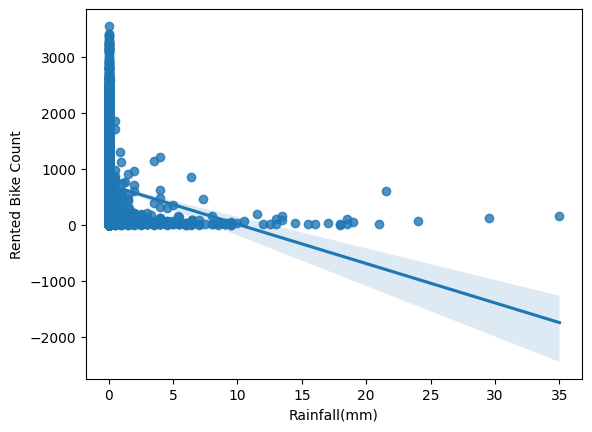

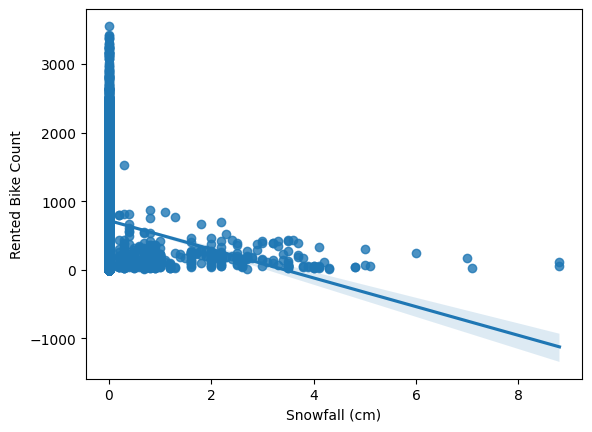

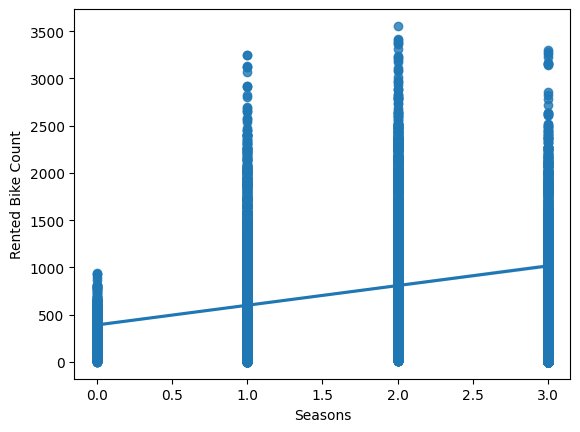

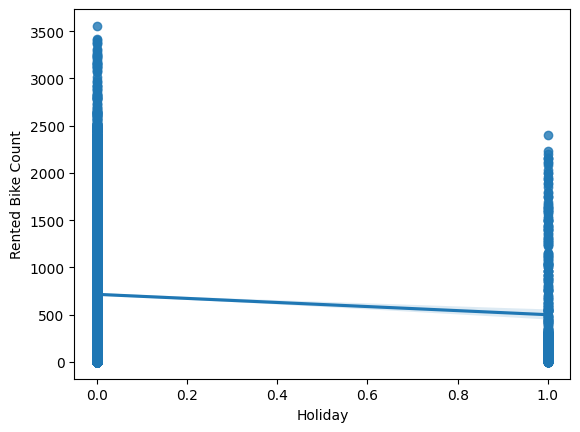

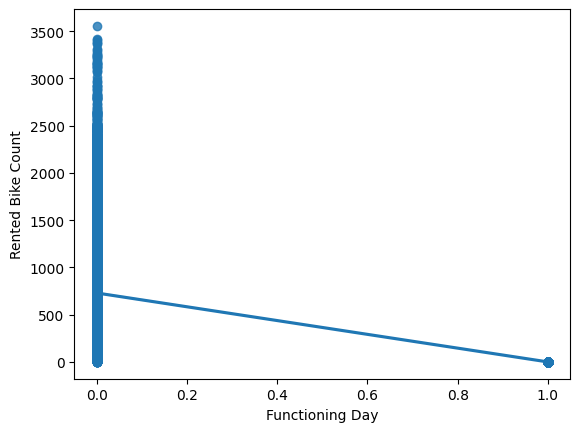

In [5]:
for feature in data.columns:
    sns.regplot(x=feature,y='Rented Bike Count',data=data)
    plt.xlabel(feature)
    plt.show()

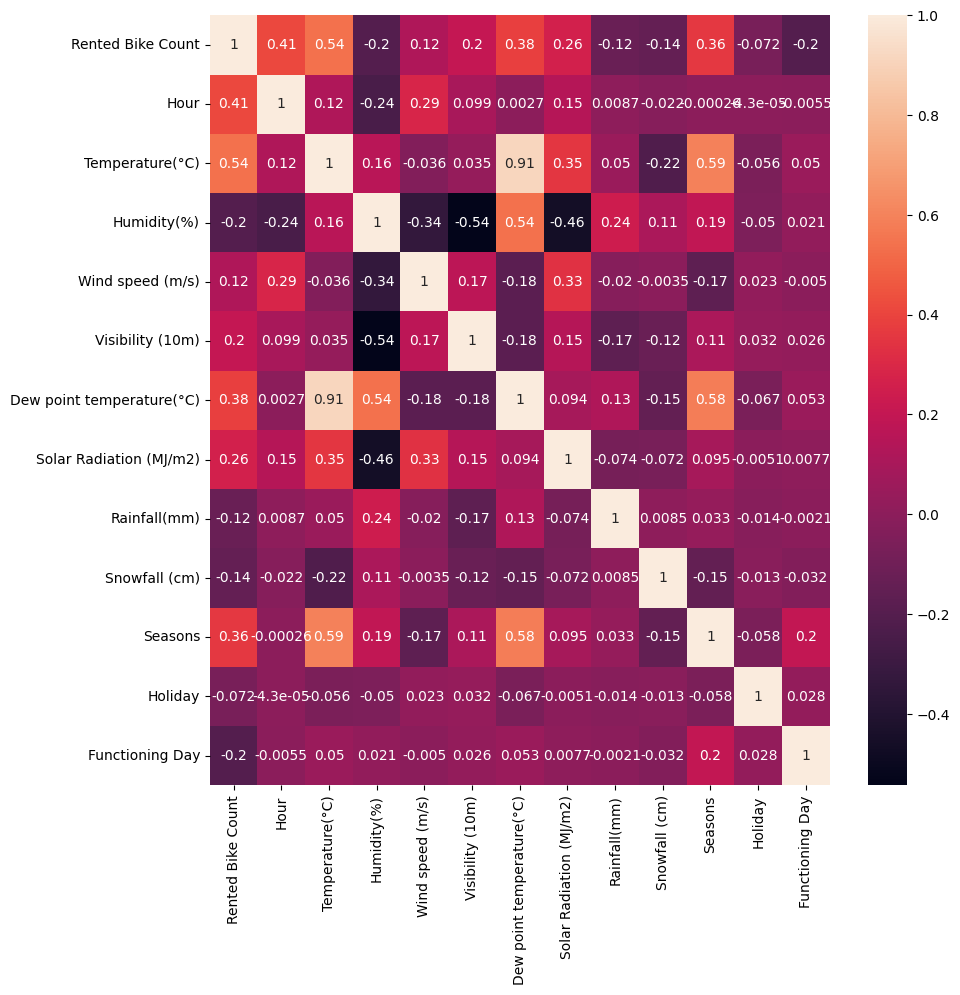

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

(c) Variables other than Data seems to be fine for predicitng the output variable as seen form the correlation plot

In [7]:
df2 = data.copy()
df2 = df2.drop(columns=['Dew point temperature(°C)'])
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(df2.iloc[:,1:],df2.iloc[:,0],test_size=0.2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]   
vif['features']=xtrain.columns
vif.sort_values('VIF',ascending=False)

,VIF,features
2,5.255239,Humidity(%)
4,5.178129,Visibility (10m)
8,4.921043,Seasons
3,4.703422,Wind speed (m/s)
1,4.386083,Temperature(°C)
0,3.941742,Hour
5,2.231914,Solar Radiation (MJ/m2)
7,1.113606,Snowfall (cm)
10,1.081014,Functioning Day
6,1.072188,Rainfall(mm)


(d) We generally drop variables with VIF>10 but as can be seen in heatmap of correlations, temperature is most related to the target variable so keeping it and dropping Dew point temperature(°C)

Initial try with decision trees regressor

In [8]:
score_card = pd.DataFrame()

In [9]:
df2 = data.copy()
df2 = df2.drop(columns=['Dew point temperature(°C)'])

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(df2.iloc[:,1:],df2.iloc[:,0],test_size=0.2)
dtr = DecisionTreeRegressor().fit(xtrain,ytrain)
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

1.0
0.7054679182263164


In [11]:
y_pred = dtr.predict(xtest)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
#r2_score
r2=r2_score(ytest,y_pred)
Dtree_notOneHot_NotNormalized_noValidation = pd.Series({
                     'Model_Name': "Dtree_notOneHot_NotNormalized_noValidation",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_card = score_card.append(Dtree_notOneHot_NotNormalized_noValidation, ignore_index=True)

score_card

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3352\368760124.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(Dtree_notOneHot_NotNormalized_noValidation, ignore_index=True)


,Model_Name,RMSE,R-Squared
0,Dtree_notOneHot_NotNormalized_noValidation,353.487696,0.705468


(e)

In [12]:
import pandas as pd
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_not_normalize = ['Rented Bike Count', 'Hour', 'Seasons', 'Holiday', 'Functioning Day']
column_names_to_normalize = [x for x in list(df2) if x not in column_names_to_not_normalize ]
x = df2[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df2_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df2.index)
df2[column_names_to_normalize] = df2_temp
df2.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,204,1,0.215035,0.387755,0.108108,1.0,0.0,0.0,0.0,0,0,0
1,173,2,0.206294,0.397959,0.135135,1.0,0.0,0.0,0.0,0,0,0
2,107,3,0.202797,0.408163,0.121622,1.0,0.0,0.0,0.0,0,0,0
3,78,4,0.206294,0.367347,0.310811,1.0,0.0,0.0,0.0,0,0,0
4,100,5,0.199301,0.377551,0.202703,1.0,0.0,0.0,0.0,0,0,0


In [13]:
df3 = df2.copy()
df4 = pd.get_dummies(df3, prefix=['Seasons', 'Holiday', 'Functioning Day'], columns=['Seasons', 'Holiday', 'Functioning Day'])
df4.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_0,Seasons_1,Seasons_2,Seasons_3,Holiday_0,Holiday_1,Functioning Day_0,Functioning Day_1
0,204,1,0.215035,0.387755,0.108108,1.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0
1,173,2,0.206294,0.397959,0.135135,1.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0
2,107,3,0.202797,0.408163,0.121622,1.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0
3,78,4,0.206294,0.367347,0.310811,1.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0
4,100,5,0.199301,0.377551,0.202703,1.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0


In [14]:
print(df4.isnull().sum())

Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons_0                  0
Seasons_1                  0
Seasons_2                  0
Seasons_3                  0
Holiday_0                  0
Holiday_1                  0
Functioning Day_0          0
Functioning Day_1          0
dtype: int64


No missing values in any variables

In [15]:
df4.shape

(8759, 17)

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(df4.iloc[:,1:],df4.iloc[:,0],test_size=0.2)
dtr = DecisionTreeRegressor().fit(xtrain,ytrain)
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

1.0
0.7369322021766762


In [17]:
y_pred = dtr.predict(xtest)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
#r2_score
r2=r2_score(ytest,y_pred)
Dtree_OneHot_Normalized_noValidation = pd.Series({
                     'Model_Name': "Dtree_OneHot_Normalized_noValidation",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_card = score_card.append(Dtree_OneHot_Normalized_noValidation, ignore_index=True)

score_card

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3352\3731523923.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(Dtree_OneHot_Normalized_noValidation, ignore_index=True)


,Model_Name,RMSE,R-Squared
0,Dtree_notOneHot_NotNormalized_noValidation,353.487696,0.705468
1,Dtree_OneHot_Normalized_noValidation,326.753544,0.736932


In [18]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

pca = PCA()
xtrain2 = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
explained_variance = pca.explained_variance_ratio_
evr=pd.DataFrame()
evr['VIF']=explained_variance*100  
evr['features']=xtrain.columns
evr.sort_values('VIF',ascending=False)
evr.round(2)

,VIF,features
0,97.62,Hour
1,0.60,Temperature(°C)
2,0.53,Humidity(%)
3,0.52,Wind speed (m/s)
4,0.23,Visibility (10m)
5,0.18,Solar Radiation (MJ/m2)
6,0.12,Rainfall(mm)
7,0.12,Snowfall (cm)
8,0.03,Seasons_0
9,0.03,Seasons_1


In [19]:
from sklearn.decomposition import PCA
xtrain,xtest,ytrain,ytest = train_test_split(df4.iloc[:,1:],df4.iloc[:,0],test_size=0.2)
pca = PCA(n_components=10)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
from sklearn.ensemble import RandomForestClassifier

dtr = DecisionTreeRegressor().fit(xtrain,ytrain)
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

1.0
0.6914458286167307


In [20]:
y_pred = dtr.predict(xtest)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
#r2_score
r2=r2_score(ytest,y_pred)
Dtree_WithPCA = pd.Series({
                     'Model_Name': "Dtree_WithPCA",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_card = score_card.append(Dtree_WithPCA, ignore_index=True)

score_card

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3352\3329833416.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(Dtree_WithPCA, ignore_index=True)


,Model_Name,RMSE,R-Squared
0,Dtree_notOneHot_NotNormalized_noValidation,353.487696,0.705468
1,Dtree_OneHot_Normalized_noValidation,326.753544,0.736932
2,Dtree_WithPCA,355.776716,0.691446


(f) As we can see , using PCA to get even top 10 features doesn't work and reduces R2 score as when using all features

(g) I'm using Decision tree and Random forest regressor as we low number of features and large samples

(h)

In [21]:
X_train, X_test, y_train, y_test  = train_test_split(df4.iloc[:,1:],df4.iloc[:,0],test_size=0.15)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.176, random_state=1) # 0.176*0.85=0.15

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['mse'],
           'max_depth':range(12,13),
           'min_samples_leaf':range(8,9),
           'min_samples_split':range(2,10)}
gr = GridSearchCV(DecisionTreeRegressor(),param_grid,cv=5,n_jobs=-1)
gr.fit(X_val, y_val)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': range(12, 13),
                         'min_samples_leaf': range(8, 9),
                         'min_samples_split': range(2, 10)})

In [23]:
gr.best_params_

{'criterion': 'mse',
 'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [24]:
dtr = DecisionTreeRegressor(criterion='mse',max_depth=12,min_samples_leaf=8,min_samples_split=3).fit(X_train,y_train)
print(dtr.score(X_train,y_train))
print(dtr.score(X_val, y_val))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.8969450869951443
0.8172176349004658


In [25]:
y_pred = dtr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#r2_score
r2=r2_score(y_test,y_pred)
DTree_withHyperParTuning = pd.Series({
                     'Model_Name': "DTree_withHyperParTuning",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_card = score_card.append(DTree_withHyperParTuning, ignore_index=True)

score_card

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3352\2509104611.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(DTree_withHyperParTuning, ignore_index=True)


,Model_Name,RMSE,R-Squared
0,Dtree_notOneHot_NotNormalized_noValidation,353.487696,0.705468
1,Dtree_OneHot_Normalized_noValidation,326.753544,0.736932
2,Dtree_WithPCA,355.776716,0.691446
3,DTree_withHyperParTuning,265.426962,0.846257


In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=7).fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_val, y_val))

0.9718854822722514
0.8584045042775127


In [27]:
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#r2_score
r2=r2_score(y_test,y_pred)
RFR_withValidation = pd.Series({
                     'Model_Name': "RFR_withValidation",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_card = score_card.append(RFR_withValidation, ignore_index=True)

score_card

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3352\163187678.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(RFR_withValidation, ignore_index=True)


,Model_Name,RMSE,R-Squared
0,Dtree_notOneHot_NotNormalized_noValidation,353.487696,0.705468
1,Dtree_OneHot_Normalized_noValidation,326.753544,0.736932
2,Dtree_WithPCA,355.776716,0.691446
3,DTree_withHyperParTuning,265.426962,0.846257
4,RFR_withValidation,266.241106,0.845313


In [28]:
from sklearn.model_selection import cross_val_score
score=[]
for n in range(1,100):
    rfr = RandomForestRegressor(n_estimators=n,n_jobs=-1)
    rfrscore = cross_val_score(rfr,X_train,y_train,cv=5).mean()
    score.append(rfrscore)

In [29]:
print(max(score),score.index(max(score)))

0.8628676456277354 81


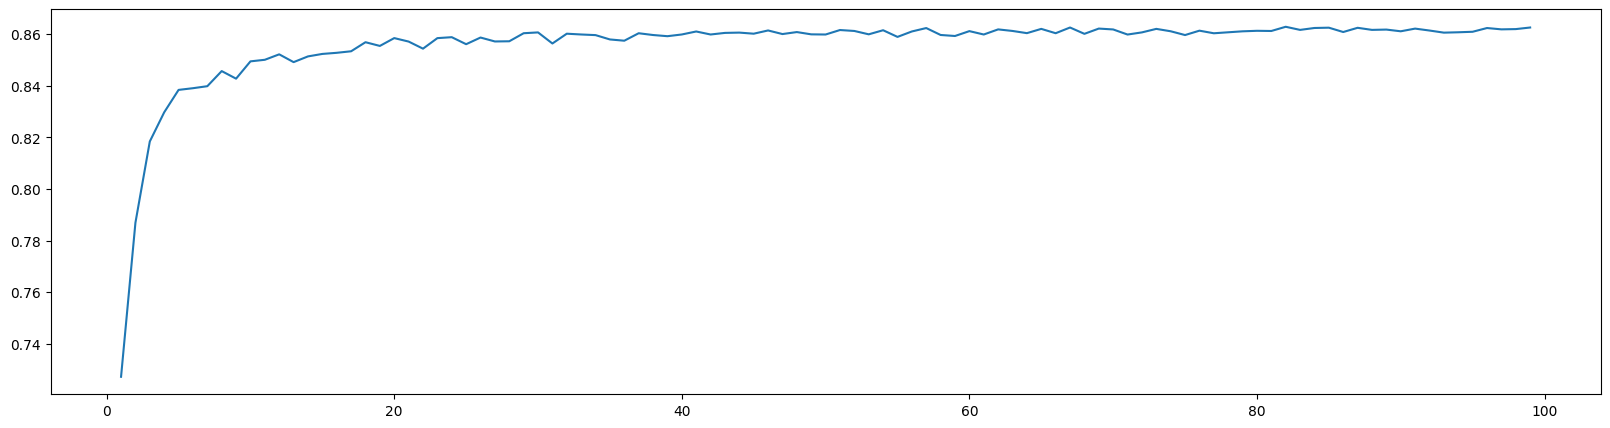

In [30]:
plt.figure(figsize=(20,5))
sns.lineplot(x=range(1,100),y=score)
plt.show()

In [31]:
rfr = RandomForestRegressor(n_estimators=74,n_jobs=-1).fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_val, y_val))
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#r2_score
r2=r2_score(y_test,y_pred)
RFR_with_HyperparaTuning = pd.Series({
                     'Model_Name': "RFR_with_HyperparaTuning",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

0.9811636586125444
0.8684241179270525


In [32]:
score_card = score_card.append(RFR_with_HyperparaTuning, ignore_index=True)
score_card

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3352\3902472829.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(RFR_with_HyperparaTuning, ignore_index=True)


,Model_Name,RMSE,R-Squared
0,Dtree_notOneHot_NotNormalized_noValidation,353.487696,0.705468
1,Dtree_OneHot_Normalized_noValidation,326.753544,0.736932
2,Dtree_WithPCA,355.776716,0.691446
3,DTree_withHyperParTuning,265.426962,0.846257
4,RFR_withValidation,266.241106,0.845313
5,RFR_with_HyperparaTuning,241.140889,0.873105


# Q3 (Classify gestures by reading muscle activity)

In [33]:
all_files = ['0 (1).csv', '1.csv', '2.csv', '3.csv']
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()
frame.columns = frame.columns.map(str)
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


(a) As gestures classes is integer, it is discrete dataype, it is a supervised problem , **last column(classes)** is the target variable

(b) As this would a classification task, taking Accuracy and F1 score as performance criteria

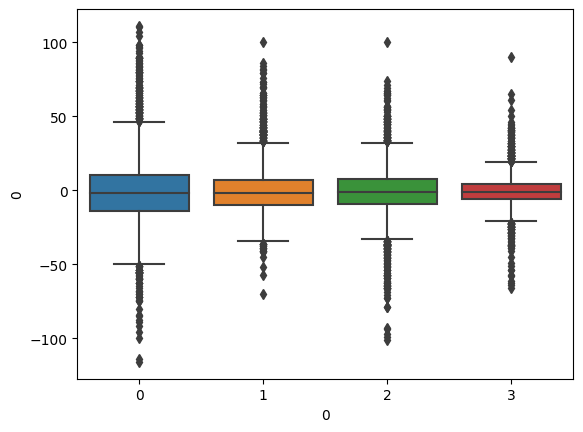

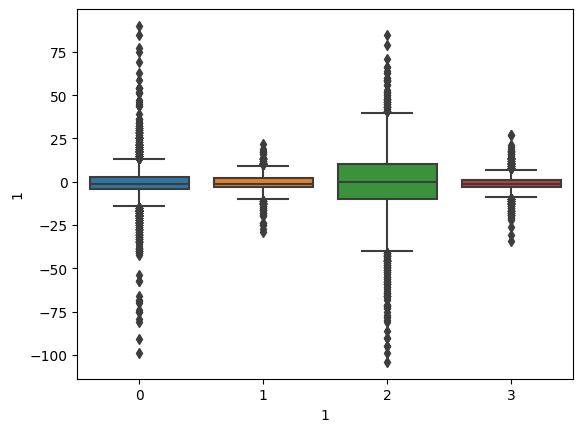

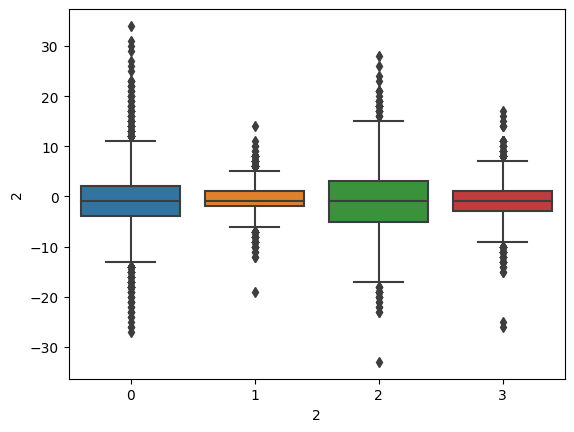

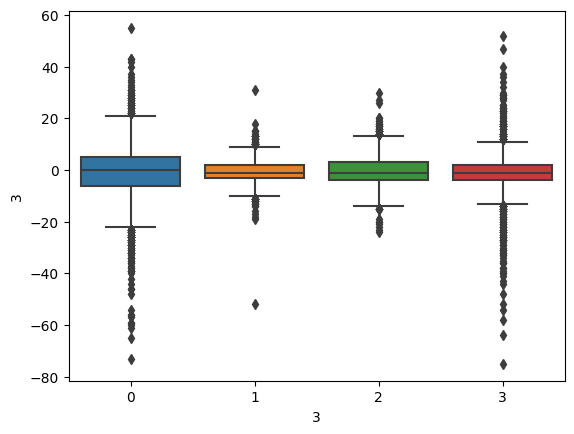

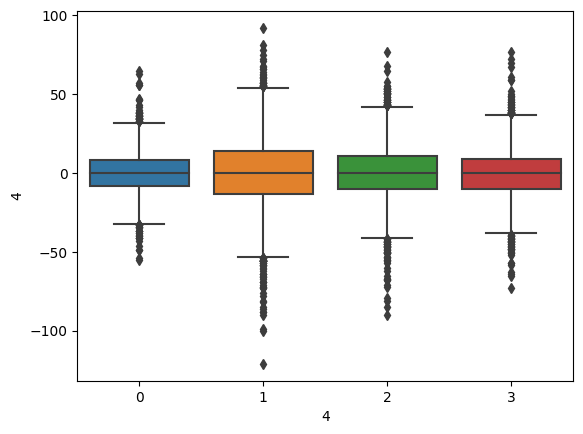

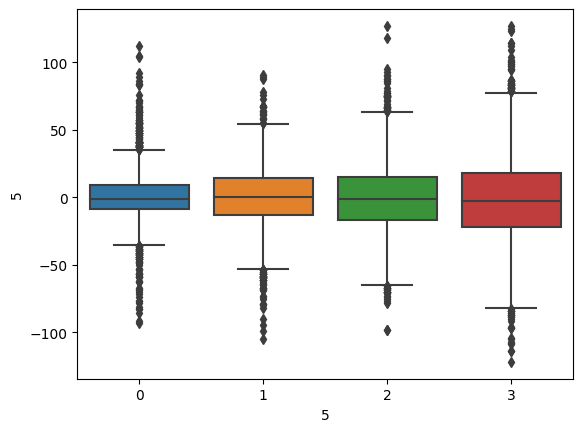

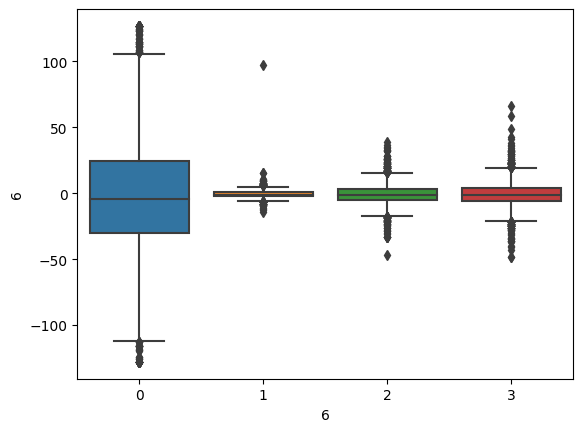

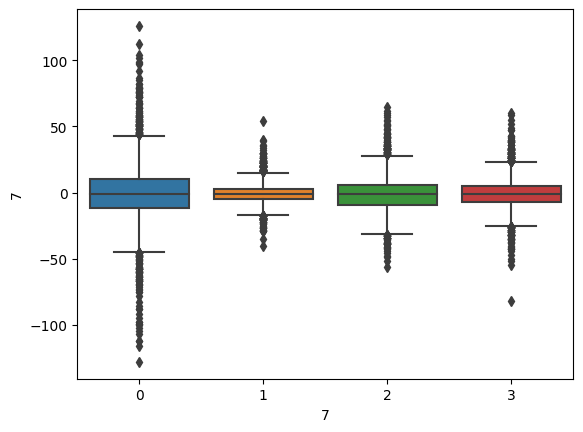

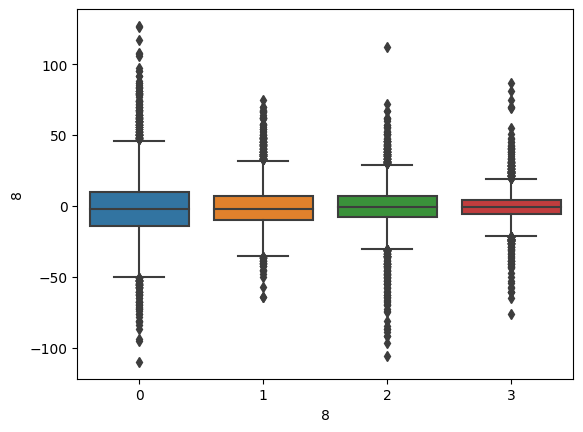

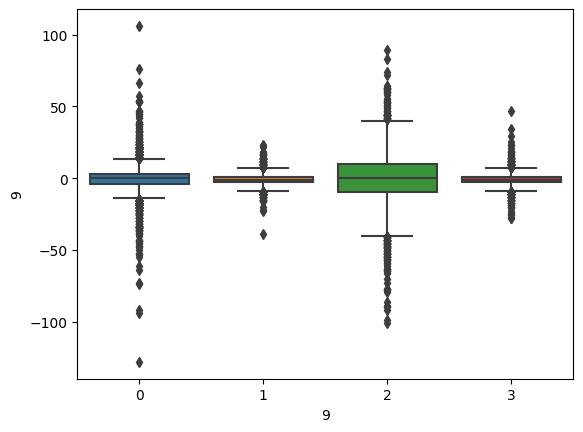

In [34]:
data=frame.copy()

#print(data.isnull().sum())
for feature in data.columns[:10]:
    #print(data[feature], data.iloc[:,64])
    sns.boxplot(x="64", y=feature, data=data)
    plt.xlabel(feature)
    plt.show()

In [35]:
df2 = data.copy()
#df2 = df2.drop(columns=['Dew point temperature(°C)'])
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(df2.iloc[:,1:],df2.iloc[:,0],test_size=0.2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]   
vif['features']=xtrain.columns
vif.sort_values('VIF',ascending=False)

,VIF,features
27,2.540137,28
19,2.520335,20
35,2.473591,36
43,2.459263,44
34,2.346991,35
...,...,...
55,1.454637,56
56,1.453058,57
7,1.450008,8
63,1.404781,64


(c), (d) We generally drop variables with VIF>10 but as can be seen there are no feature with >10VIF, so we won't drop any feature

Initial try with decision trees regressor

In [36]:
score_card = pd.DataFrame()

In [37]:
df2 = data.copy()
#df2 = df2.drop(columns=['Dew point temperature(°C)'])
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [38]:
X = df2.iloc[:,:64].values
Y = df2.iloc[:,64].values

In [39]:
df4 = df2.copy()
from sklearn.decomposition import PCA
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)
pca = PCA(n_components=45)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)

from sklearn.ensemble import RandomForestClassifier
clf = SVC().fit(xtrain,ytrain)
y_pred = clf.predict(xtest)
f1score = (f1_score(ytest, y_pred,average='weighted'))
#print(clf.score(xtrain,ytrain))
acc = (clf.score(xtest,ytest))
RFC_initial = pd.Series({
                     'Model_Name': "RFC_initial",
                     'f1_score':f1score,
                     'Accuracy':acc ,
                   })
score_card = score_card.append(RFC_initial, ignore_index=True)

score_card

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3352\2239238051.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(RFC_initial, ignore_index=True)


,Model_Name,f1_score,Accuracy
0,RFC_initial,0.869426,0.870719


So pca with 10 compoennets is not working, going to use SelectFromModel from sklearn

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
trans = SelectFromModel(clf, threshold=-np.inf, max_features=45)
X_trans = trans.fit_transform(X, Y)
print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, X_trans.shape[1]))

We started with 63 features but retained only 45 of them!


In [41]:
X_train, X_test, y_train, y_test  = train_test_split(X_trans,Y,test_size=0.15)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.176, random_state=1) # 0.176*0.85=0.15

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
clf = SVC().fit(X_train,y_train)
# print(clf.score(X_train,y_train))
# print(clf.score(X_val,y_val))
y_pred = clf.predict(X_val)
f1score = (f1_score(y_val, y_pred,average='weighted'))
#print(clf.score(xtrain,ytrain))
acc = (clf.score(X_val, y_val))
SVC_initial = pd.Series({
                     'Model_Name': "SVC_initial",
                     'f1_score':f1score,
                     'Accuracy':acc ,
                   })
score_card = score_card.append(SVC_initial, ignore_index=True)

score_card = score_card[['Model_Name', 'f1_score','Accuracy' ]]
score_card

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3352\2093412413.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(SVC_initial, ignore_index=True)


,Model_Name,f1_score,Accuracy
0,RFC_initial,0.869426,0.870719
1,SVC_initial,0.867568,0.868346


In [43]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_SVC = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid_SVC.fit(X_val,y_val) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [44]:
# print best parameter after tuning 
print(grid_SVC.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_SVC.best_estimator_) 

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.0001)


In [45]:
y_pred = grid_SVC.predict(X_val) 

f1score = (f1_score(y_val, y_pred,average='weighted'))
#print(clf.score(xtrain,ytrain))
acc = (grid_SVC.score(X_val, y_val))
SVC_HyperTuning = pd.Series({
                     'Model_Name': "SVC_HyperTuning",
                     'f1_score':f1score,
                     'Accuracy':acc ,
                   })
score_card = score_card.append(SVC_HyperTuning, ignore_index=True)

score_card = score_card[['Model_Name', 'f1_score','Accuracy' ]]
score_card

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3352\2547742375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(SVC_HyperTuning, ignore_index=True)


,Model_Name,f1_score,Accuracy
0,RFC_initial,0.869426,0.870719
1,SVC_initial,0.867568,0.868346
2,SVC_HyperTuning,0.995997,0.995993


In [46]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
dtree_model = clf.fit(X_train, y_train) 
print(clf.score(X_train, y_train))

1.0


In [47]:
y_pred = dtree_model.predict(X_val) 
from sklearn.metrics import f1_score
# print(f1_score(y_test, y_pred,average='weighted'))
# print(clf.score(X_test, y_test))

f1score = (f1_score(y_val, y_pred,average='weighted'))
#print(clf.score(xtrain,ytrain))
acc = (dtree_model.score(X_val, y_val))
DTC_initial = pd.Series({
                     'Model_Name': "DTC_initial",
                     'f1_score':f1score,
                     'Accuracy':acc ,
                   })
score_card = score_card.append(DTC_initial, ignore_index=True)

score_card = score_card[['Model_Name', 'f1_score','Accuracy' ]]
score_card

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3352\1210716878.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(DTC_initial, ignore_index=True)


,Model_Name,f1_score,Accuracy
0,RFC_initial,0.869426,0.870719
1,SVC_initial,0.867568,0.868346
2,SVC_HyperTuning,0.995997,0.995993
3,DTC_initial,0.777409,0.776760


In [48]:
from sklearn.model_selection import GridSearchCV 
from scipy.stats import randint
# defining parameter range 
param_grid = { 'criterion' : ['gini', 'entropy'],
              "max_features": np.arange(1, 9),
              "min_samples_leaf": np.arange(1, 9),
    'max_depth' : [2,4,6,8,10,12]
    }  
  
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(X_val,y_val) 


Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8])},
             verbose=1)

In [49]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks af"ter hyper-parameter tuning 
print(grid.best_estimator_) 

{'criterion': 'gini', 'max_depth': 12, 'max_features': 8, 'min_samples_leaf': 7}
DecisionTreeClassifier(max_depth=12, max_features=8, min_samples_leaf=7)


In [50]:
y_pred = grid.predict(X_val) 
# print(f1_score(y_test, y_pred,average='weighted'))
# print(clf.score(X_test, y_test))


f1score = (f1_score(y_val, y_pred,average='weighted'))
#print(clf.score(xtrain,ytrain))
acc = (grid.score(X_val, y_val))
DTC_HyperTuning = pd.Series({
                     'Model_Name': "DTC_HyperTuning",
                     'f1_score':f1score,
                     'Accuracy':acc ,
                   })
score_card = score_card.append(DTC_HyperTuning, ignore_index=True)

score_card = score_card[['Model_Name', 'f1_score','Accuracy' ]]
score_card

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3352\2907151073.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(DTC_HyperTuning, ignore_index=True)


,Model_Name,f1_score,Accuracy
0,RFC_initial,0.869426,0.870719
1,SVC_initial,0.867568,0.868346
2,SVC_HyperTuning,0.995997,0.995993
3,DTC_initial,0.777409,0.776760
4,DTC_HyperTuning,0.794948,0.799084


So the best model is SVC_HyperTuning, Checking test scores for this model

In [51]:
y_pred = grid_SVC.predict(X_test)
print(f1_score(y_test, y_pred,average='weighted'))
print(grid_SVC.score(X_test, y_test))


0.8088735446189308
0.8105022831050228


Accuracy of test set is 80%, which is decent and model is usable

# Q4

In [52]:
X = df2.iloc[:,:64].values
Y = df2.iloc[:,64].values

In [53]:
from sklearn.decomposition import PCA
loss_list=[]
x = np.linalg.norm(X, axis=0)
stnd_dev = np.std(x)
required_feat = 0

for i in range(64):
    pca = PCA(n_components=i+1)
    X_train_pca = pca.fit_transform(X)
    X_projected = pca.inverse_transform(X_train_pca)
    loss =  ((X - X_projected) ** 2).mean()
    #print(loss)
    if ((loss<(0.01*stnd_dev)) & (required_feat==0)):
        required_feat = i+1

    loss_list.append(loss)

In [54]:
print('Features required for given criteria: ', required_feat)

Features required for given criteria:  48


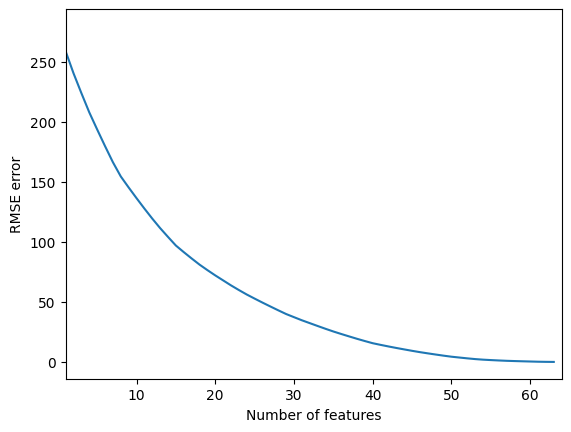

In [55]:
plt.plot(loss_list)
plt.xlabel('Number of features')
plt.ylabel('RMSE error')
plt.xlim(1,64)
plt.show()